In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
train = pd.read_csv('Datasets/orders_train.txt', sep = ';')
train.shape

(481092, 14)

In [5]:
train.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0


In [4]:
test = pd.read_csv('Datasets/orders_class.txt', sep = ';')
test.shape

(50078, 13)

In [6]:
test.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,?,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23


#### In the intructions of the project, it is stated that "?" is Null Values. Let's double check there is none "?" after specifying na_values = '?' when reading the daset)

## Initial Exploration

In [5]:
## Checking Coefficient = 0 in the columns
for i in range(0, len(train.iloc[0,:])):
    
    count = 0

    for j in range(0, len(train.iloc[:,0])):
    
        if (train.iloc[j, i] == '?'):
            count = count + 1
            
    print("Column Index: ", i)
    print("Number of ? in the column: ", count)
    print('')

Column Index:  0
Number of ? in the column:  0

Column Index:  1
Number of ? in the column:  0

Column Index:  2
Number of ? in the column:  0

Column Index:  3
Number of ? in the column:  0

Column Index:  4
Number of ? in the column:  0

Column Index:  5
Number of ? in the column:  0

Column Index:  6
Number of ? in the column:  0

Column Index:  7
Number of ? in the column:  0

Column Index:  8
Number of ? in the column:  0

Column Index:  9
Number of ? in the column:  0

Column Index:  10
Number of ? in the column:  0

Column Index:  11
Number of ? in the column:  0

Column Index:  12
Number of ? in the column:  0

Column Index:  13
Number of ? in the column:  0



#### returnShipment

In [6]:
round(train['returnShipment'].value_counts() / train.shape[0],3)

0    0.518
1    0.482
Name: returnShipment, dtype: float64

46.6% is the benchmark of returns. That means anything with a return rate higher than 48.6% will be considered as high return percentage.

#### orderItemID

In [ ]:
print('There are', len(np.unique(train['orderItemID'])), end=' ')
print("different orders.")

#### manufacturerID

In [8]:
print('There are', len(np.unique(train['manufacturerID'])), end=' ')
print("different manufacturers.")

There are 165 different manufacturers.


#### ItemID

In [9]:
print('There are', len(np.unique(train['itemID'])), end=' ')
print("different items.")

There are 3007 different items.


#### orderDate

In [10]:
train['orderDate']

0         2012-04-01
1         2012-04-01
2         2012-04-01
3         2012-04-02
4         2012-04-02
             ...    
481087    2013-03-31
481088    2013-03-31
481089    2013-03-31
481090    2013-03-31
481091    2013-03-31
Name: orderDate, Length: 481092, dtype: object

In [11]:
# Getting Dates to the right format
train['orderDate'] = pd.to_datetime(train['orderDate'], format = '%Y-%m-%d')
train['orderDate']

0        2012-04-01
1        2012-04-01
2        2012-04-01
3        2012-04-02
4        2012-04-02
            ...    
481087   2013-03-31
481088   2013-03-31
481089   2013-03-31
481090   2013-03-31
481091   2013-03-31
Name: orderDate, Length: 481092, dtype: datetime64[ns]

#### deliveryDate & dateOfBirth

In [12]:
train.shape

(481092, 14)

In [13]:
train['deliveryDate'] = pd.to_datetime(train['deliveryDate'], format = '%Y-%m-%d')
train['dateOfBirth'] = pd.to_datetime(train['dateOfBirth'], format = "%Y-%m-%d", errors = 'coerce')

#### Size

In [14]:
counting_sizes = train.groupby('size').count().sort_values('returnShipment', ascending = False)
counting_sizes.iloc[0:15,:]

,orderItemID,orderDate,deliveryDate,itemID,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
size,,,,,,,,,,,,,
l,37289,37289,34517,37289,37289,37289,37289,37289,37289,33890,37289,37289,37289
xl,34972,34972,32043,34972,34972,34972,34972,34972,34972,32143,34972,34972,34972
40,34118,34118,31374,34118,34118,34118,34118,34118,34118,30393,34118,34118,34118
m,32337,32337,29898,32337,32337,32337,32337,32337,32337,29223,32337,32337,32337
39,29318,29318,26438,29318,29318,29318,29318,29318,29318,25970,29318,29318,29318
L,28445,28445,26754,28445,28445,28445,28445,28445,28445,25140,28445,28445,28445
xxl,27247,27247,24876,27247,27247,27247,27247,27247,27247,25205,27247,27247,27247
unsized,26039,26039,24295,26039,25896,26039,26039,26039,26039,23654,26039,26039,26039
XL,25155,25155,23638,25155,25155,25155,25155,25155,25155,22791,25155,25155,25155


#### Color

In [15]:
counting_color = train.groupby('color').count().sort_values('returnShipment', ascending = False)
counting_color

,orderItemID,orderDate,deliveryDate,itemID,size,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
color,,,,,,,,,,,,,
black,86252,86252,79834,86252,86252,86252,86252,86252,86252,77649,86252,86252,86252
blue,48180,48180,44353,48180,48180,48180,48180,48180,48180,43077,48180,48180,48180
grey,42273,42273,38876,42273,42273,42273,42273,42273,42273,38112,42273,42273,42273
red,39074,39074,35493,39074,39074,39074,39074,39074,39074,34946,39074,39074,39074
brown,32842,32842,29850,32842,32842,32842,32842,32842,32842,29209,32842,32842,32842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
lemon,4,4,4,4,4,4,4,4,4,2,4,4,4
cortina mocca,3,3,3,3,3,3,3,3,3,2,3,3,3
perlmutt,3,3,3,3,3,3,3,3,3,3,3,3,3


In [16]:
counting_color = train.groupby('color').count().sort_values('returnShipment', ascending = False)
counting_color.iloc[44:45,:]

,orderItemID,orderDate,deliveryDate,itemID,size,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
color,,,,,,,,,,,,,
mahagoni,592,592,541,592,592,592,592,592,592,537,592,592,592


### Is brwon even a color?

In [17]:
train[train['color'] == 'brwon'].head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
1037,1038,2012-04-01,2012-04-05,20,42,brwon,15,54.95,1571,Mrs,1966-07-25,Lower Saxony,2011-06-06,0
1766,1767,2012-04-02,2012-05-07,653,38,brwon,15,54.95,1883,Mrs,NaT,Lower Saxony,2012-02-28,1
7136,7137,2012-04-07,NaT,913,8+,brwon,48,89.90,4201,Mrs,1953-04-02,North Rhine-Westphalia,2012-03-25,0
8351,8352,2012-04-09,2012-04-27,617,43,brwon,15,54.95,4671,Mrs,1972-08-04,Bavaria,2012-04-08,0
13696,13697,2012-04-10,2012-05-07,653,39,brwon,15,54.95,6517,Mrs,NaT,Bavaria,2012-04-10,0


## ManufacturerID 15 has the color brown misspelled. Does that causes a higher return rate?

In [18]:
train[train['color'] == 'blau'].head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
320,321,2012-04-01,2012-04-04,32,l,blau,3,24.9,1191,Mrs,1963-06-21,Lower Saxony,2012-03-31,1
573,574,2012-04-01,2012-04-26,32,xl,blau,3,24.9,1317,Mrs,1900-11-19,Bavaria,2011-11-03,0
905,906,2012-04-01,2012-04-04,32,m,blau,3,21.9,1507,Mrs,1957-12-14,North Rhine-Westphalia,2011-02-16,1
1017,1018,2012-04-03,2012-04-04,32,xxl,blau,3,24.9,1563,Mrs,1955-02-12,Hamburg,2012-03-28,0
1394,1395,2012-04-01,2012-04-06,32,l,blau,3,21.9,1748,Mrs,1968-02-06,Saxony,2012-04-01,0


## ManufacturerID 3 has the color blue misspelled. Does that causes a higher return rate?

In [19]:
# Creating table with the number of returns and no returns 
manufacturer_15 = pd.DataFrame(pd.crosstab(train['manufacturerID'], train['returnShipment']))
manufacturer_15.columns = ['No_Return', 'Return']

#omputing the total sales number
manufacturer_15['Tot_Sales'] = manufacturer_15['No_Return'] + manufacturer_15['Return']

# Temporary variable to store Tot_Sales
first_column = manufacturer_15.pop('Tot_Sales')

# Tot_Sales to the first column
manufacturer_15.insert(0, 'Tot_Sales', first_column)

# Computing row-wise percentage
manufacturer_15['No_Return_Pct'] = round(manufacturer_15['No_Return'] / manufacturer_15['Tot_Sales'], 2)
manufacturer_15['Return_Pct'] = round(manufacturer_15['Return'] / manufacturer_15['Tot_Sales'], 2)

# Sorting based on the return pecentage
manufacturer_15 = manufacturer_15.sort_values(by = 'Return_Pct', ascending = False)
manufacturer_15['manufacturerID'] = manufacturer_15.index
manufacturer_15 = manufacturer_15.reset_index(drop = True)
manufacturer_15[manufacturer_15['manufacturerID'] == 15]

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,manufacturerID
114,2939,1970,969,0.67,0.33,15


In [20]:
# Creating table with the number of returns and no returns 
manufacturer_3 = pd.DataFrame(pd.crosstab(train['manufacturerID'], train['returnShipment']))
manufacturer_3.columns = ['No_Return', 'Return']

#omputing the total sales number
manufacturer_3['Tot_Sales'] = manufacturer_3['No_Return'] + manufacturer_3['Return']

# Temporary variable to store Tot_Sales
first_column = manufacturer_3.pop('Tot_Sales')

# Tot_Sales to the first column
manufacturer_3.insert(0, 'Tot_Sales', first_column)

# Computing row-wise percentage
manufacturer_3['No_Return_Pct'] = round(manufacturer_3['No_Return'] / manufacturer_3['Tot_Sales'], 2)
manufacturer_3['Return_Pct'] = round(manufacturer_3['Return'] / manufacturer_3['Tot_Sales'], 2)

# Sorting based on the return pecentage
manufacturer_3 = manufacturer_3.sort_values(by = 'Return_Pct', ascending = False)
manufacturer_3['manufacturerID'] = manufacturer_3.index
manufacturer_3 = manufacturer_3.reset_index(drop = True)
manufacturer_3[manufacturer_3['manufacturerID'] == 3]

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,manufacturerID
103,65505,40007,25498,0.61,0.39,3


## Both of the manufacturer had 37% of return, which is a pretty good rate compared to the rest of the data. Therefore, the misspelling in the collor did not have much effect.

In [21]:
train['color'] = np.where(train['color'] == 'brwon', 'brown', train['color'])
train['color'] = np.where(train['color'] == 'blau', 'blue', train['color'])

In [22]:
train.shape

(481092, 14)

#### price

#### customerID

#### salutation

#### Checking if it is possible to indentify gender using salutation

In [23]:
train['salutation'].value_counts()

Mrs             461769
Mr               16720
Family            1891
Company            361
not reported       351
Name: salutation, dtype: int64

#### state

#### creationDate

# Ratio exploration

## Return by ItemID

In [24]:
# Creating table with the number of returns and no returns 
item_return = pd.DataFrame(pd.crosstab(train['itemID'], train['returnShipment']))
item_return.columns = ['No_Return', 'Return']

# Computing the item total sales
item_return['Tot_Sales'] = item_return['No_Return'] + item_return['Return']

# Temporary variable to store Tot_Sales variable
first_column = item_return.pop('Tot_Sales')
  
# Tot_Sales to first position
item_return.insert(0, 'Tot_Sales', first_column)

# Computing the row-wise percentage
item_return['No_Return_Pct'] = round(item_return['No_Return'] / item_return['Tot_Sales'], 2)
item_return['Return_Pct'] = round(item_return['Return'] / item_return['Tot_Sales'], 2)

# Sorting based on return percentage
item_return = item_return.sort_values(by = 'Return_Pct', ascending = False)
item_return['itemID'] = item_return.index
item_return = item_return.reset_index(drop = True)
## item_return

# Selecting items with more than 100 orders
item_to_select = item_return[(item_return['Tot_Sales'] > 100) & (item_return['Return_Pct'] > 0.6)]
item_to_select.iloc[0:30,:]

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,itemID
111,126,10,116,0.08,0.92,60
117,147,14,133,0.10,0.90,29
127,371,53,318,0.14,0.86,2456
137,422,69,353,0.16,0.84,443
152,182,33,149,0.18,0.82,2500
153,129,23,106,0.18,0.82,1144
157,276,50,226,0.18,0.82,611
169,519,106,413,0.20,0.80,1471
180,554,117,437,0.21,0.79,238
181,549,115,434,0.21,0.79,1667


In [25]:
train.shape

(481092, 14)

## Return by Size

In [26]:
# Creating table with the number of returns and no returns 
size_return = pd.DataFrame(pd.crosstab(train['size'], train['returnShipment']))
size_return.columns = ['No_Return', 'Return']

# Computing the total sales number
size_return['Tot_Sales'] = size_return['No_Return'] + size_return['Return']

# Temporary variable to store Tot_Sales
first_column = size_return.pop('Tot_Sales')

# Tot_Sales to the first column
size_return.insert(0, 'Tot_Sales', first_column)

# Computing row-wise percentage
size_return['No_Return_Pct'] = round(size_return['No_Return'] / size_return['Tot_Sales'], 2)
size_return['Return_Pct'] = round(size_return['Return'] / size_return['Tot_Sales'], 2)

# Sorting based on the return pecentage
size_return = size_return.sort_values(by = 'Return_Pct', ascending = False)
size_return['size'] = size_return.index
size_return = size_return.reset_index(drop = True)

# Selecting more than 100 orders
size_return[(size_return['Tot_Sales'] >= 100) & (size_return['Return_Pct'] > 0.48)]

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,size
9,425,177,248,0.42,0.58,23
11,674,286,388,0.42,0.58,50
12,698,302,396,0.43,0.57,40+
13,2092,900,1192,0.43,0.57,8
15,1055,457,598,0.43,0.57,10
16,3751,1601,2150,0.43,0.57,48
17,5828,2570,3258,0.44,0.56,46
19,1732,762,970,0.44,0.56,7
20,2210,972,1238,0.44,0.56,6
21,317,142,175,0.45,0.55,18


## Return by manufacturerID

In [27]:
# Creating table with the number of returns and no returns 
manufacturer_return = pd.DataFrame(pd.crosstab(train['manufacturerID'], train['returnShipment']))
manufacturer_return.columns = ['No_Return', 'Return']

#omputing the total sales number
manufacturer_return['Tot_Sales'] = manufacturer_return['No_Return'] + manufacturer_return['Return']

# Temporary variable to store Tot_Sales
first_column = manufacturer_return.pop('Tot_Sales')

# Tot_Sales to the first column
manufacturer_return.insert(0, 'Tot_Sales', first_column)

# Computing row-wise percentage
manufacturer_return['No_Return_Pct'] = round(manufacturer_return['No_Return'] / manufacturer_return['Tot_Sales'], 2)
manufacturer_return['Return_Pct'] = round(manufacturer_return['Return'] / manufacturer_return['Tot_Sales'], 2)

# Sorting based on the return pecentage
manufacturer_return = manufacturer_return.sort_values(by = 'Return_Pct', ascending = False)
manufacturer_return['manufacturerID'] = manufacturer_return.index
manufacturer_return = manufacturer_return.reset_index(drop = True)

# Selecting more than 100 orders
manufacturer_return = manufacturer_return[(manufacturer_return['Tot_Sales'] >= 100) & (manufacturer_return['Return_Pct'] > 0.5)]
manufacturer_return

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,manufacturerID
3,141,23,118,0.16,0.84,96
4,187,35,152,0.19,0.81,101
5,197,39,158,0.20,0.80,89
6,217,67,150,0.31,0.69,100
7,304,94,210,0.31,0.69,152
10,8879,2926,5953,0.33,0.67,113
13,122,41,81,0.34,0.66,81
14,432,150,282,0.35,0.65,147
15,584,212,372,0.36,0.64,58
16,5110,1892,3218,0.37,0.63,25


In [28]:
manufacturer_return['Tot_Sales'].sum()

221159

## Returns by State

In [29]:
# Creating table with the number of returns and no returns 
state_return = pd.DataFrame(pd.crosstab(train['state'], train['returnShipment']))
state_return.columns = ['No_Return', 'Return']

#omputing the total sales number
state_return['Tot_Sales'] = state_return['No_Return'] + state_return['Return']

# Temporary variable to store Tot_Sales
first_column = state_return.pop('Tot_Sales')

# Tot_Sales to the first column
state_return.insert(0, 'Tot_Sales', first_column)

# Computing row-wise percentage
state_return['No_Return_Pct'] = round(state_return['No_Return'] / state_return['Tot_Sales'], 2)
state_return['Return_Pct'] = round(state_return['Return'] / state_return['Tot_Sales'], 2)

# Sorting based on the return pecentage
state_return = state_return.sort_values(by = 'Return_Pct', ascending = False)
state_return['state'] = state_return.index
state_return = state_return.reset_index(drop = True)
state_return

,Tot_Sales,No_Return,Return,No_Return_Pct,Return_Pct,state
0,14869,7317,7552,0.49,0.51,Saxony
1,5587,2749,2838,0.49,0.51,Saxony-Anhalt
2,10784,5372,5412,0.50,0.50,Brandenburg
3,7167,3559,3608,0.50,0.50,Mecklenburg-Western Pomerania
4,7176,3568,3608,0.50,0.50,Thuringia
5,69045,35558,33487,0.51,0.49,Lower Saxony
6,24215,12357,11858,0.51,0.49,Rhineland-Palatinate
7,23667,12178,11489,0.51,0.49,Schleswig-Holstein
8,63081,32684,30397,0.52,0.48,Baden-Wuerttemberg
9,68649,35384,33265,0.52,0.48,Bavaria


In [30]:
state_return['Return_Pct'].mean()

0.48312500000000014

<AxesSubplot:>

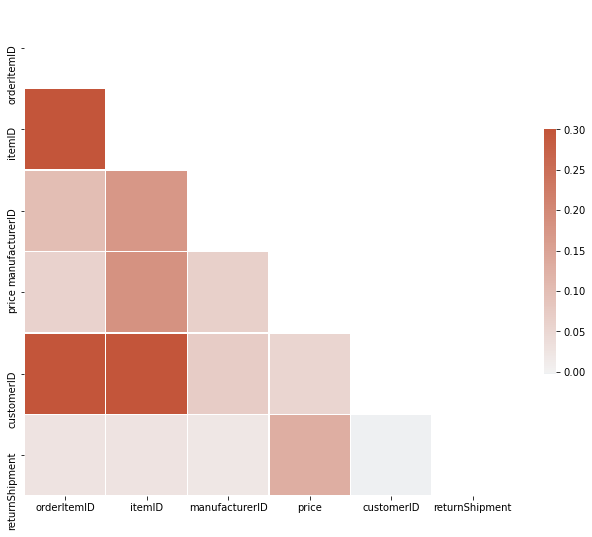

In [31]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0, '0 = Not Returned | 1 = Returned')

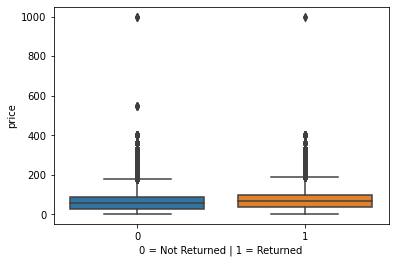

In [32]:
# Boxplot
sns.boxplot( x=train["returnShipment"], y=train["price"]).set_xlabel('0 = Not Returned | 1 = Returned')

In [33]:
train.shape

(481092, 14)

In [34]:
train.to_csv('train_dataset.csv', index = False)